170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 12s 0us/step


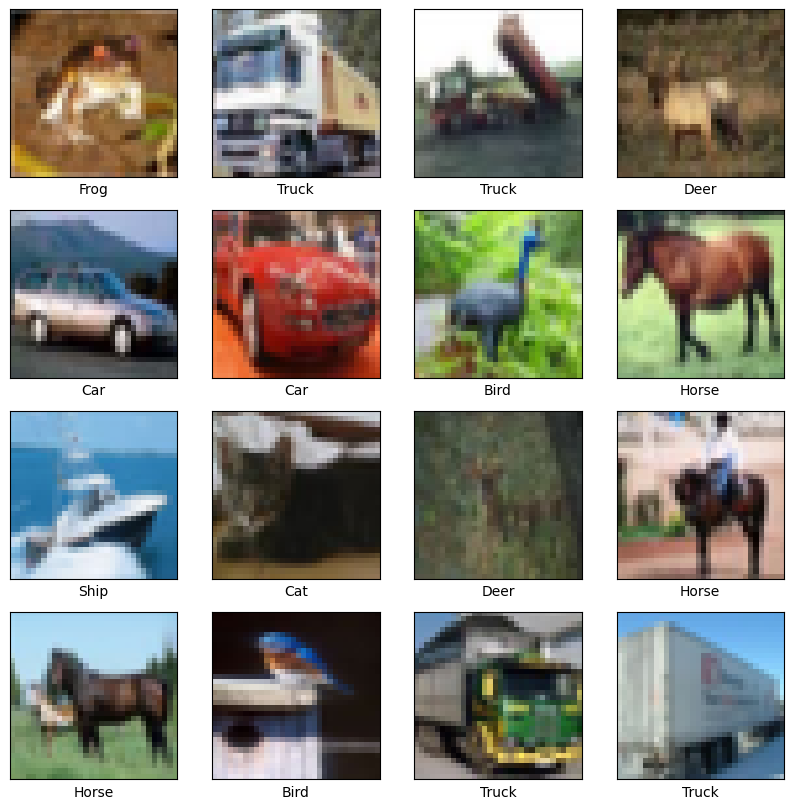

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 36s 55ms/step - accuracy: 0.2694 - loss: 1.9593 - val_accuracy: 0.4507 - val_loss: 1.5399
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 51ms/step - accuracy: 0.4806 - loss: 1.4343 - val_accuracy: 0.5270 - val_loss: 1.3018
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 43s 55ms/step - accuracy: 0.5465 - loss: 1.2759 - val_accuracy: 0.5600 - val_loss: 1.2271
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 37s 49ms/step - accuracy: 0.6021 - loss: 1.1319 - val_accuracy: 0.5935 - val_loss: 1.1561
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 48ms/step - accuracy: 0.6276 - loss: 1.0517 - val_accuracy: 0.6035 - val_loss: 1.1196
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 31s 50ms/step - accuracy: 0.6601 - loss: 0.9601 - val_accuracy: 0.6033 - val_loss: 1.1195
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 51ms/step - accuracy: 0.6894 - loss: 0.8820 - val_accuracy: 0.6070 - val_loss: 1.1122
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 50ms/step - accuracy: 0.7156 - loss: 0.8039 - 

Loss: 1.1040366888046265
Accuracy: 0.6337500214576721


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import models, layers

# Load CIFAR-10 dataset
(training_images, training_labels), (testing_images, testing_labels) = cifar10.load_data()

# Normalize the pixel values to be between 0 and 1
training_images, testing_images = training_images / 255.0, testing_images / 255.0

# Define class names
class_names = ['Plane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Display the first 16 images with their labels
plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(training_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[training_labels[i][0]])
plt.show()

# Subset of data
training_images = training_images[:20000]
training_labels = training_labels[:20000]
testing_images = testing_images[:4000]
testing_labels = testing_labels[:4000]

# Define the model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(training_images, training_labels, epochs=10, validation_data=(testing_images, testing_labels))

# Evaluate the model
loss, accuracy = model.evaluate(testing_images, testing_labels)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")

# Save the model
model.save('image_classifier.h5')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
Prediction is: Cat


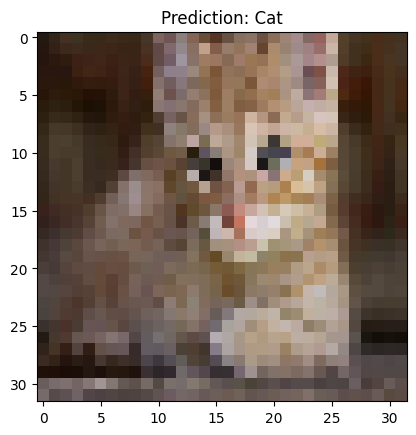

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras import models

# Define class names
class_names = ['Plane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Load the pre-trained model
model = models.load_model(r'/content/image_classifier.h5')

# Load and preprocess the image
img_path = r'/content/th.jpg'
img = cv2.imread(img_path)

if img is not None:
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (32, 32))
    plt.imshow(img)

    # Make prediction
    prediction = model.predict(np.array([img]) / 255.0)
    index = np.argmax(prediction)
    print('Prediction is:', class_names[index])
    plt.title(f"Prediction: {class_names[index]}")
    plt.show()
else:
    print(f"Error: Could not load image at {img_path}")
